# PHAS0056: Practical Machine Learning for Physicists: Week 3 Exercise: 

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Some style imports
import matplotlib.style 
import matplotlib as mpl

# Import some image handling/loading libraries
from scipy import ndimage

# Added for a progress bar
from tqdm import tqdm
import imageio

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.6.0


## Set Up Data and Noise Function:

In [2]:
# The original handwritten digit MNIST
mnist = keras.datasets.mnist  

# Setting training and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalise training/ test images
train_images= train_images/np.max(train_images)
test_images= test_images/np.max(test_images)

In [3]:
def MNISTnoise(images, y_noise):
    '''Function to add noise to MNIST images:
    images - The array of all MNIST images
    y_noise - Maximum value for uniform noise distribution
    
    Returns:
    image_noise-  Normalised MNIST images with noise'''
    
    # Generate the noise array that the same size as images
    noise = np.random.uniform(0, y_noise, size = images.shape)
    
    # Add noises to the images
    image_noise = images + noise
    
    # Loop over the images to normalise by dividing by max value in each image
    for i in range(len(image_noise)):
        image_noise[i]/= np.max(image_noise[i])
    
    return image_noise

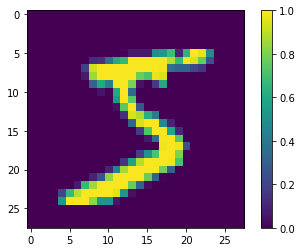

In [4]:
# Test code to test noise function
plt.imshow(MNISTnoise(train_images, 0)[0])
plt.colorbar()
plt.show()

## Training Model:

In [2]:
# Set up neural network model 

# Sequential is a standard layered neural network
model = keras.Sequential([
    
    #Add a fully-connected (Dense) layer  of 128 nodes with 28x28 input nodes with reLU activation
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    
    # A 10 node in the output layer for each number
    keras.layers.Dense(10) ])

# Compile the network with cross entropy loss and stochastic gradient descent optimiser with learning rate of 1.0
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

NameError: name 'keras' is not defined

In [6]:
# Train network with training images with no noise
history = model.fit(train_images, train_labels, batch_size=100, epochs=30, verbose=0)

# Test accuracy of trained network
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('The accuracy of the network is', test_acc)

The accuracy of the network is 0.9767000079154968


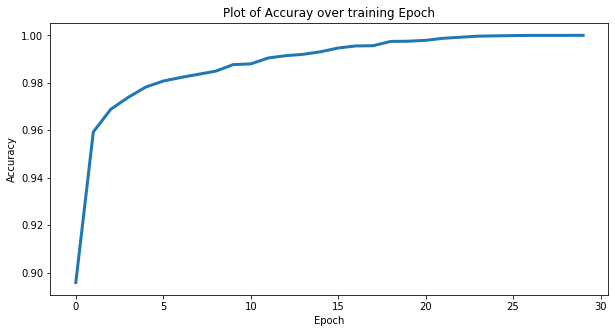

In [7]:
# Plotting accuracy over epochs
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(history.history['accuracy'], linewidth=3)

# Setting axis and labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Accuray over training Epoch')
plt.show()

## Testing over range of noise:

In [8]:
# Array of set noise values
y = np.linspace(0, 1, 25)

# Array to hold results
results = np.zeros(len(y))

# Loop testing network over sets of test images with varying noise
for i, yi in enumerate(tqdm(y)):
    # Test with current noise value over MNIST images
    test_loss, test_acc = model.evaluate(MNISTnoise(test_images, yi), test_labels, verbose=0)
    
    # Log accuracy
    results[i] = test_acc

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  1.77it/s]


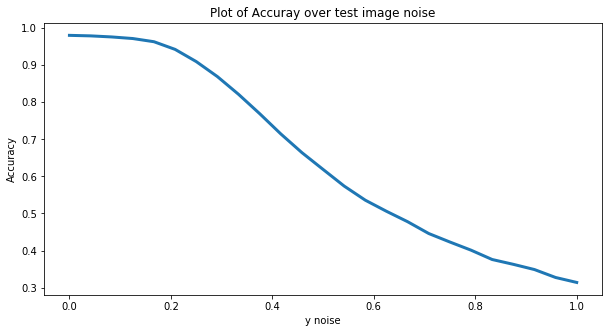

In [9]:
# Plotting accuray of model over noise of test image
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(y, results, linewidth=3)

# Setting axis and labels
ax.set_xlabel('y noise')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Accuray over test image noise')
plt.show()

## Retraining model with noise :

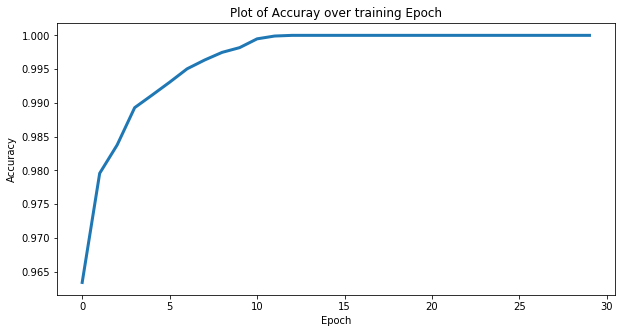

In [10]:
# Training noise
y0 = 0.25

# Retraining with noise
history2 = model.fit( MNISTnoise(train_images, y0), train_labels, batch_size=100, epochs=30, verbose=0 )

# Plotting accuracy over epochs
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(history2.history['accuracy'], linewidth=3)

# Setting axis and labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Accuray over training Epoch')
plt.show()

In [11]:
 # Array of set noise values
y = np.linspace(0, 1, 25)

# Array to hold results
results2 = np.zeros(len(y))

# Loop testing network over sets of test images with varying noise
for i, yi in enumerate(tqdm(y)):
    # Test with current noise value over MNIST images
    test_loss, test_acc = model.evaluate(MNISTnoise(test_images, yi), test_labels, verbose=0)
    
    # Log accuracy
    results2[i] = test_acc

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:12<00:00,  2.00it/s]


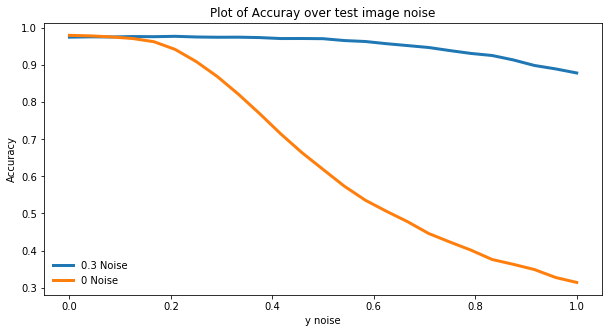

In [12]:
# Plotting accuray of model over noise of test image
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(y, results2, linewidth=3, label= '0.25 Noise ')
ax.plot(y, results, linewidth=3, label= '0 Noise')

# Setting axis and labels
ax.set_xlabel('y noise')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Accuray over test image noise')
ax.legend()
plt.show()

### Commentary:
- We see retraining the network with noise images significantly improves the accuracy over different levels of noise in the test images; where as with no noise the accuracy drops off greatly after 0.2 noise in the test images, with the retrained data the accuracy stays above 80% over the whole range. This is as the retrained network has a much greater diversity in training so is better able to deal with variations in images. Although we see a small drop in accuracy at the low level of noise this is expected but the network is better overal as it is more accurate over the whole range. We could quantify this by looking at the integral, as this will give the area under each curve denoting accuracy the over whole range. 


## Exploring various training noise values:

In [13]:
# Sequential is a standard layered neural network
model2 = keras.Sequential([
    
    #Add a fully-connected (Dense) layer  of 128 nodes with 28x28 input nodes with reLU activation
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    
    # A 10 node in the output layer for each number
    keras.layers.Dense(10) ])

# Compile the network with cross entropy loss and stochastic gradient descent optimiser with learning rate of 1.0
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

In [14]:
# Array of noise values for retraining 
y_training_noise = np.linspace(0, 1, 11)

# Array of noise values for testing network accuracy 
y_testing_noise = np.linspace(0, 1, 25)

# Array for holding results for accuracy over noise range for each retrained network
noise_result = np.zeros([len(y_training_noise), len(y_testing_noise)])

for i in tqdm(range(len(y_training_noise))):
    # Retraining model with current noise value
    history3 = model2.fit( MNISTnoise(train_images, y_training_noise[i]), train_labels, 
                         batch_size=100, epochs=30, verbose=0 )
   
    for j in range(len(y_testing_noise)) :
        # Testing accuracy of retrained network over range of noisy images
        test_loss, test_acc = model2.evaluate(MNISTnoise(test_images, y_testing_noise[j]), test_labels, verbose=0)
        
        # Record results
        noise_result[i,j] = test_acc

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [06:19<00:00, 34.10s/it]


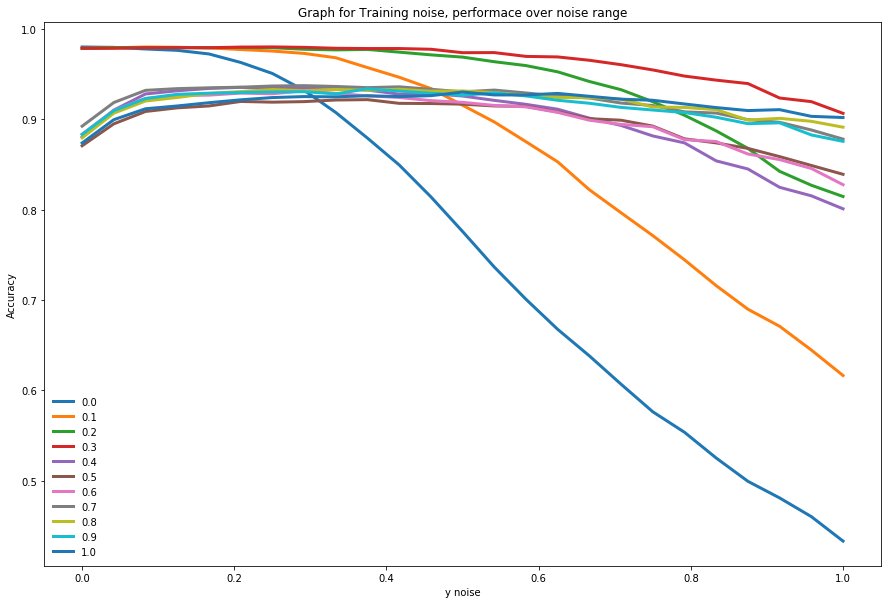

In [15]:
# Plot range of accuracies for 
fig, ax = plt.subplots(figsize=(15,10))

# Loop plotting each result
for i in range(len(y_training_noise)):
    ax.plot(y_testing_noise, noise_result[i], linewidth=3, label= '{0:.1f}'.format(y_training_noise[i]))  

# Setting labels, legend and title
ax.set_xlabel('y noise')
ax.set_ylabel('Accuracy')
ax.set_title('Graph for Training noise, performace over noise range')
ax.legend()

plt.show()

#### Commentary:
- Looking we can see the variation depending on the testing noise, we can see succesive retrain improves the general performace and from inspection we see the best noise seems to be 0.3-0.5: we see that for 0.6 and above there is a drop in the accuracy around zero noise compare to the others and they perform around that same accuracy for all other testing noise values. We also see for 0.2 and less there is a significant drops at the higher test noise. 0.4 and 0.5 show the highest accuracy over the whole range.

- Its important to note, each retraining has a compound effect so there is the element that high training noise values benifit from the earlier training, for example retraining a fresh network on noise of 0.3 or above results in failure and the higher noise training can only be achieved with the successive retraining